In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
deltax = 0.1
deltat=0.004
Nx = 11
Nt = 800
u=np.zeros((Nx,Nt))
u1=np.zeros((Nx,Nt))
u2=np.zeros((Nx,Nt))
c=deltat/deltax
k=np.zeros(Nt)
k1=np.zeros(Nt)
ubar=np.zeros(Nx)

<function matplotlib.pyplot.show(close=None, block=None)>

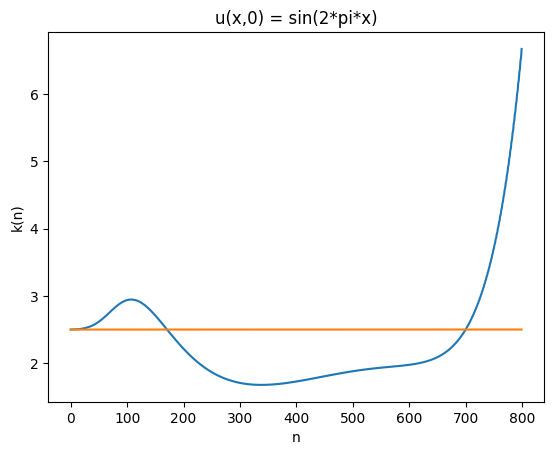

In [9]:
for i in range(Nx):
    u[i,0]=np.sin(2*np.pi*i*deltax)
for j in range(1, Nx - 1):
    u[j, 1] =u[j,0]-c*((u[j+1,0]+u[j,0])**2-(u[j-1,0]+u[j,0])**2)/8
# 周期边界条件（第一层）
u[0, 1] = u[0,0]-c*((u[1,0]+u[0,0])**2-(u[Nx-1,0]+u[0,0])**2)/8
u[Nx - 1, 1] =u[Nx -1,0]-c*((u[0,0]+u[Nx - 1,0])**2-(u[Nx - 2,0]+u[Nx - 1,0])**2)/8
for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u[m, n] = u[m, n - 2] - c * ((u[m + 1, n - 1] + u[m , n - 1]) ** 2 - (u[m , n - 1] + u[m - 1, n - 1]) ** 2)/4
    
    # 周期边界条件
    u[0, n] = u[0, n - 2] - c * ((u[ 1, n - 1] + u[0 , n - 1]) ** 2 - (u[0 , n - 1] + u[Nx - 1, n - 1]) ** 2)/4
    u[Nx - 1, n] = u[Nx - 1, n - 2] - c * ((u[0, n - 1] + u[Nx - 1 , n - 1]) ** 2 - (u[Nx - 1 , n - 1] + u[Nx - 2, n - 1]) ** 2)/4
for i in range(Nt):
    k[i]=np.sum(u[:,i]**2)/2
plt.plot(k)

for i in range(Nx):
    u2[i, 0] = np.sin(2 * np.pi * i * deltax) 
    u1[i, 0] = u2[i, 0]  

# 时间推进
for n in range(1, Nt):
    while True:
        # 预测步
        for m in range(1, Nx - 1):
            u1[m, n] = u1[m, n - 1] - c * (u1[m + 1, n - 1] + u1[m, n - 1] + u1[m - 1, n - 1]) * (u1[m+1, n-1] - u1[m-1, n-1])
        
        # 周期边界条件
        u1[0, n] = u1[0, n - 1] - c * (u1[1, n-1] + u1[0, n-1] + u1[Nx-1, n-1]) * (u1[1, n-1] - u1[Nx-1, n-1])
        u1[Nx-1, n] = u1[Nx-1, n - 1] - c * (u1[0, n-1] + u1[Nx-1, n-1] + u1[Nx-2, n-1]) * (u1[0, n-1] - u1[Nx-2, n-1])
        
        # 计算中间值
        for i in range(Nx):
            ubar[i] = 0.5 * (u1[i, n] + u2[i, n-1])  
        
        # 校正步
        for m in range(1, Nx - 1):
            u2[m, n] = ubar[m] - c * (ubar[m+1] + ubar[m-1] + ubar[m]) * (ubar[m+1] - ubar[m-1])
        
        # 周期边界条件
        u2[0, n] = ubar[0] - c * (ubar[1] + ubar[0] + ubar[Nx-1]) * (ubar[1] - ubar[Nx-1])
        u2[Nx-1, n] = ubar[Nx-1] - c * (ubar[0] + ubar[Nx-1] + ubar[Nx-2]) * (ubar[0] - ubar[Nx-2])
        
        # 检查收敛
        if np.max(np.abs(u2[:, n] - u1[:, n])) < 1e-6:
            break
        else:
            u1[:, n-1] = (u2[:, n-1] + u2[:, n]) / 2
for i in range(Nt):
    k1[i] = np.sum(u2[:, i] ** 2) / 2
plt.plot(k1)
plt.title('u(x,0) = sin(2*pi*x)')
plt.xlabel('n')
plt.ylabel('k(n)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

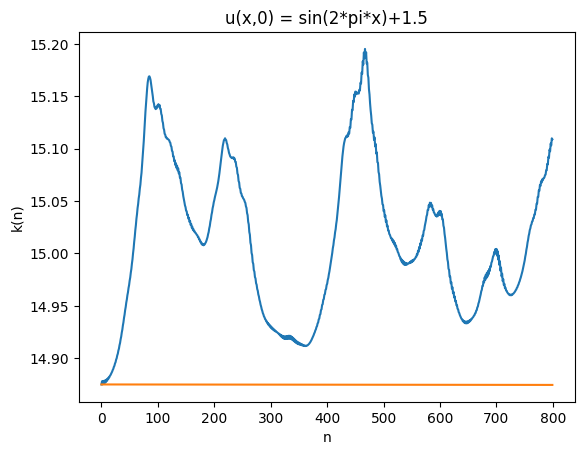

In [10]:
for i in range(Nx):
    u[i,0]=np.sin(2*np.pi*i*deltax)+1.5
for j in range(1, Nx - 1):
    u[j, 1] =u[j,0]-c*((u[j+1,0]+u[j,0])**2-(u[j-1,0]+u[j,0])**2)/8
# 周期边界条件（第一层）
u[0, 1] = u[0,0]-c*((u[1,0]+u[0,0])**2-(u[Nx-1,0]+u[0,0])**2)/8
u[Nx - 1, 1] =u[Nx -1,0]-c*((u[0,0]+u[Nx - 1,0])**2-(u[Nx - 2,0]+u[Nx - 1,0])**2)/8
for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u[m, n] = u[m, n - 2] - c * ((u[m + 1, n - 1] + u[m , n - 1]) ** 2 - (u[m , n - 1] + u[m - 1, n - 1]) ** 2)/4
    
    # 周期边界条件
    u[0, n] = u[0, n - 2] - c * ((u[ 1, n - 1] + u[0 , n - 1]) ** 2 - (u[0 , n - 1] + u[Nx - 1, n - 1]) ** 2)/4
    u[Nx - 1, n] = u[Nx - 1, n - 2] - c * ((u[0, n - 1] + u[Nx - 1 , n - 1]) ** 2 - (u[Nx - 1 , n - 1] + u[Nx - 2, n - 1]) ** 2)/4
for i in range(Nt):
    k[i]=np.sum(u[:,i]**2)/2
plt.plot(k)

for i in range(Nx):
    u2[i, 0] = np.sin(2 * np.pi * i * deltax) +1.5
    u1[i, 0] = u2[i, 0]  

# 时间推进
for n in range(1, Nt):
    while True:
        # 预测步
        for m in range(1, Nx - 1):
            u1[m, n] = u1[m, n - 1] - c * (u1[m + 1, n - 1] + u1[m, n - 1] + u1[m - 1, n - 1]) * (u1[m+1, n-1] - u1[m-1, n-1])
        
        # 周期边界条件
        u1[0, n] = u1[0, n - 1] - c * (u1[1, n-1] + u1[0, n-1] + u1[Nx-1, n-1]) * (u1[1, n-1] - u1[Nx-1, n-1])
        u1[Nx-1, n] = u1[Nx-1, n - 1] - c * (u1[0, n-1] + u1[Nx-1, n-1] + u1[Nx-2, n-1]) * (u1[0, n-1] - u1[Nx-2, n-1])
        
        # 计算中间值
        for i in range(Nx):
            ubar[i] = 0.5 * (u1[i, n] + u2[i, n-1])  
        
        # 校正步
        for m in range(1, Nx - 1):
            u2[m, n] = ubar[m] - c * (ubar[m+1] + ubar[m-1] + ubar[m]) * (ubar[m+1] - ubar[m-1])
        
        # 周期边界条件
        u2[0, n] = ubar[0] - c * (ubar[1] + ubar[0] + ubar[Nx-1]) * (ubar[1] - ubar[Nx-1])
        u2[Nx-1, n] = ubar[Nx-1] - c * (ubar[0] + ubar[Nx-1] + ubar[Nx-2]) * (ubar[0] - ubar[Nx-2])
        
        # 检查收敛
        if np.max(np.abs(u2[:, n] - u1[:, n])) < 1e-6:
            break
        else:
            u1[:, n-1] = (u2[:, n-1] + u2[:, n]) / 2
for i in range(Nt):
    k1[i] = np.sum(u2[:, i] ** 2) / 2
plt.plot(k1)
plt.title('u(x,0) = sin(2*pi*x)+1.5')
plt.xlabel('n')
plt.ylabel('k(n)')
plt.show

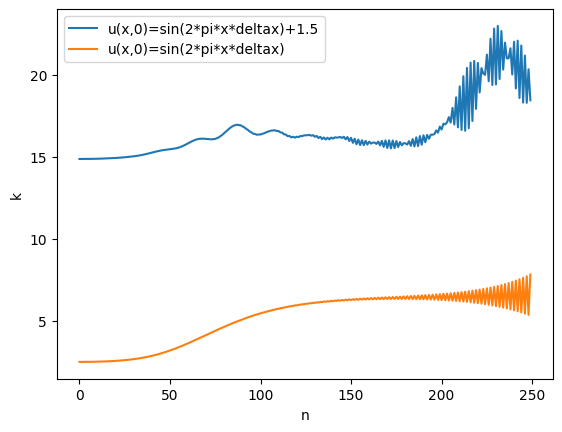

In [21]:
deltax = 0.1
deltat=0.004
Nx = 11
Nt = 250
u=np.zeros((Nx,Nt))
u1=np.zeros((Nx,Nt))
u2=np.zeros((Nx,Nt))
c=deltat/deltax
k=np.zeros(Nt)
k1=np.zeros(Nt)
ubar=np.zeros(Nx)
for i in range(Nx):
    u[i,0]=np.sin(2*np.pi*i*deltax)+1.5
for j in range(1, Nx - 1):
    u[j, 1] =u[j,0]-c*u[j,0]*(u[j+1,0]-u[j-1,0])/2
# 周期边界条件（第一层）
u[0, 1] = u[0,0]-c*u[0,0]*(u[1,0]-u[Nx-1,0])/2
u[Nx - 1, 1] =u[Nx -1,0]-c*u[Nx -1,0]*(u[0,0]-u[Nx-2,0])/2
for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u[m, n] = u[m, n - 2] - c *u[m, n - 1] * (u[m + 1, n - 1] - u[m - 1, n - 1]) 
    
    # 周期边界条件
    u[0, n] = u[0, n - 2] - c * u[0, n - 1] * (u[1, n - 1] - u[Nx - 1, n - 1])
    u[Nx - 1, n] = u[Nx - 1, n - 2] - c * u[Nx - 1, n - 1] * (u[0, n - 1] - u[Nx - 2, n - 1])
for i in range(Nt):
    k[i]=np.sum(u[:,i]**2)/2
plt.plot(k)
for i in range(Nx):
    u1[i, 0] = np.sin(2 * np.pi * i * deltax)

for j in range(1, Nx - 1):
    u1[j, 1] = u1[j, 0] - c * u1[j, 0] * (u1[j + 1, 0] - u1[j - 1, 0]) / 2

# 周期边界条件（第一层）
u1[0, 1] = u1[0, 0] - c * u1[0, 0] * (u1[1, 0] - u1[Nx - 1, 0]) / 2
u1[Nx - 1, 1] = u1[Nx - 1, 0] - c * u1[Nx - 1, 0] * (u1[0, 0] - u1[Nx - 2, 0]) / 2

for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u1[m, n] = u1[m, n - 2] - c * u1[m, n - 1] * (u1[m + 1, n - 1] - u1[m - 1, n - 1])

    # 周期边界条件
    u1[0, n] = u1[0, n - 2] - c * u1[0, n - 1] * (u1[1, n - 1] - u1[Nx - 1, n - 1])
    u1[Nx - 1, n] = u1[Nx - 1, n - 2] - c * u1[Nx - 1, n - 1] * (u1[0, n - 1] - u1[Nx - 2, n - 1])

for i in range(Nt):
    k1[i] = np.sum(u1[:, i] ** 2) / 2
plt.plot(k1)
plt.xlabel("n")
plt.ylabel("k")
plt.legend(["u(x,0)=sin(2*pi*x*deltax)+1.5","u(x,0)=sin(2*pi*x*deltax)"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

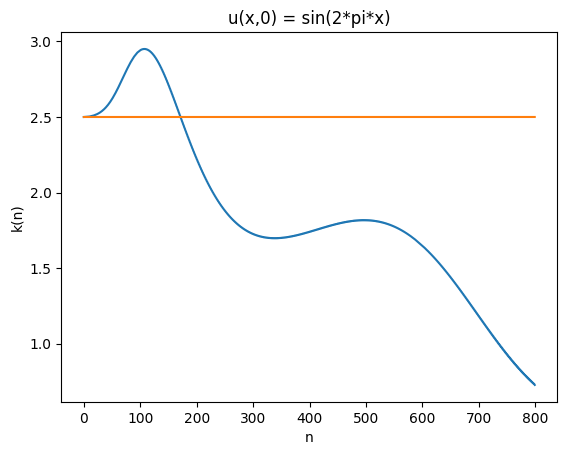

In [19]:
deltax = 0.1
deltat=0.004
Nx = 11
Nt = 800
u=np.zeros((Nx,Nt))
u1=np.zeros((Nx,Nt))
u2=np.zeros((Nx,Nt))
c=deltat/deltax
k=np.zeros(Nt)
k1=np.zeros(Nt)
ubar=np.zeros(Nx)
for i in range(Nx):
    u[i,0]=np.sin(2*np.pi*i*deltax)
for j in range(1, Nx - 1):
    u[j, 1] =u[j,0]-c*((u[j+1,0]+u[j,0])**2-(u[j-1,0]+u[j,0])**2)/8

u[0, 1] = 0
u[Nx - 1, 1] =0
for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u[m, n] = u[m, n - 2] - c * ((u[m + 1, n - 1] + u[m , n - 1]) ** 2 - (u[m , n - 1] + u[m - 1, n - 1]) ** 2)/4
    
    
    u[0, n] = 0
    u[Nx - 1, n] = 0
for i in range(Nt):
    k[i]=np.sum(u[:,i]**2)/2
plt.plot(k)

for i in range(Nx):
    u2[i, 0] = np.sin(2 * np.pi * i * deltax) 
    u1[i, 0] = u2[i, 0]  

# 时间推进
for n in range(1, Nt):
    while True:
        # 预测步
        for m in range(1, Nx - 1):
            u1[m, n] = u1[m, n - 1] - c * (u1[m + 1, n - 1] + u1[m, n - 1] + u1[m - 1, n - 1]) * (u1[m+1, n-1] - u1[m-1, n-1])
        
       
        u1[0, n] = 0
        u1[Nx-1, n] = 0
        
        # 计算中间值
        for i in range(Nx):
            ubar[i] = 0.5 * (u1[i, n] + u2[i, n-1])  
        
        # 校正步
        for m in range(1, Nx - 1):
            u2[m, n] = ubar[m] - c * (ubar[m+1] + ubar[m-1] + ubar[m]) * (ubar[m+1] - ubar[m-1])
        
      
        u2[0, n] = 0
        u2[Nx-1, n] = 0
        
        # 检查收敛
        if np.max(np.abs(u2[:, n] - u1[:, n])) < 1e-6:
            break
        else:
            u1[:, n-1] = (u2[:, n-1] + u2[:, n]) / 2
for i in range(Nt):
    k1[i] = np.sum(u2[:, i] ** 2) / 2
plt.plot(k1)
plt.title('u(x,0) = sin(2*pi*x)')
plt.xlabel('n')
plt.ylabel('k(n)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

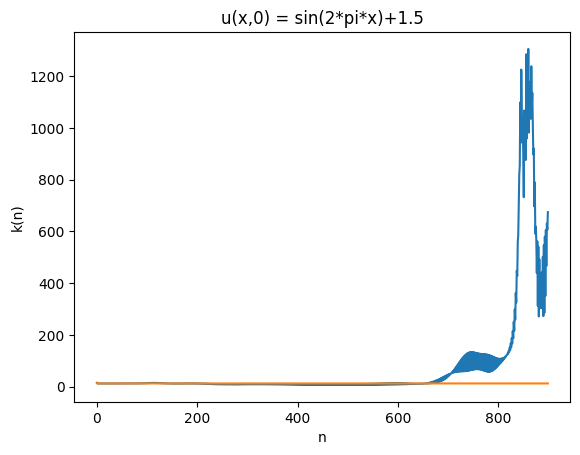

In [24]:
deltax = 0.1
deltat=0.004
Nx = 11
Nt = 900
u=np.zeros((Nx,Nt))
u1=np.zeros((Nx,Nt))
u2=np.zeros((Nx,Nt))
c=deltat/deltax
k=np.zeros(Nt)
k1=np.zeros(Nt)
ubar=np.zeros(Nx)
for i in range(Nx):
    u[i,0]=np.sin(2*np.pi*i*deltax)+1.5
for j in range(1, Nx - 1):
    u[j, 1] =u[j,0]-c*((u[j+1,0]+u[j,0])**2-(u[j-1,0]+u[j,0])**2)/8

u[0, 1] = 0
u[Nx - 1, 1] =0
for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u[m, n] = u[m, n - 2] - c * ((u[m + 1, n - 1] + u[m , n - 1]) ** 2 - (u[m , n - 1] + u[m - 1, n - 1]) ** 2)/4
    
 
    u[0, n] = 0
    u[Nx - 1, n] = 0
for i in range(Nt):
    k[i]=np.sum(u[:,i]**2)/2
plt.plot(k)

for i in range(Nx):
    u2[i, 0] = np.sin(2 * np.pi * i * deltax) +1.5
    u1[i, 0] = u2[i, 0]  

# 时间推进
for n in range(1, Nt):
    while True:
        # 预测步
        for m in range(1, Nx - 1):
            u1[m, n] = u1[m, n - 1] - c * (u1[m + 1, n - 1] + u1[m, n - 1] + u1[m - 1, n - 1]) * (u1[m+1, n-1] - u1[m-1, n-1])
        
       
        u1[0, n] = 0
        u1[Nx-1, n] = 0
        
        # 计算中间值
        for i in range(Nx):
            ubar[i] = 0.5 * (u1[i, n] + u2[i, n-1])  
        
        # 校正步
        for m in range(1, Nx - 1):
            u2[m, n] = ubar[m] - c * (ubar[m+1] + ubar[m-1] + ubar[m]) * (ubar[m+1] - ubar[m-1])
        
       
        u2[0, n] = 0
        u2[Nx-1, n] = 0
        
        # 检查收敛
        if np.max(np.abs(u2[:, n] - u1[:, n])) < 1e-6:
            break
        else:
            u1[:, n-1] = (u2[:, n-1] + u2[:, n]) / 2
for i in range(Nt):
    k1[i] = np.sum(u2[:, i] ** 2) / 2
plt.plot(k1)
plt.title('u(x,0) = sin(2*pi*x)+1.5')
plt.xlabel('n')
plt.ylabel('k(n)')
plt.show

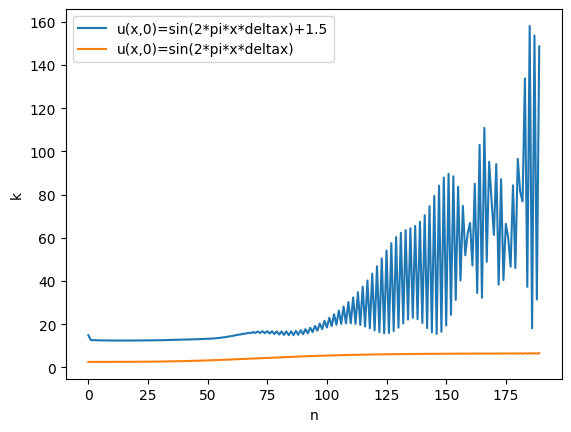

In [32]:
deltax = 0.1
deltat=0.004
Nx = 11
Nt = 190
u=np.zeros((Nx,Nt))
u1=np.zeros((Nx,Nt))
u2=np.zeros((Nx,Nt))
c=deltat/deltax
k=np.zeros(Nt)
k1=np.zeros(Nt)
ubar=np.zeros(Nx)
for i in range(Nx):
    u[i,0]=np.sin(2*np.pi*i*deltax)+1.5
for j in range(1, Nx - 1):
    u[j, 1] =u[j,0]-c*u[j,0]*(u[j+1,0]-u[j-1,0])/2

u[0, 1] = 0
u[Nx - 1, 1] =0
for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u[m, n] = u[m, n - 2] - c *u[m, n - 1] * (u[m + 1, n - 1] - u[m - 1, n - 1]) 
    
    
    u[0, n] = 0
    u[Nx - 1, n] = 0
for i in range(Nt):
    k[i]=np.sum(u[:,i]**2)/2
plt.plot(k)
for i in range(Nx):
    u1[i, 0] = np.sin(2 * np.pi * i * deltax)

for j in range(1, Nx - 1):
    u1[j, 1] = u1[j, 0] - c * u1[j, 0] * (u1[j + 1, 0] - u1[j - 1, 0]) / 2


u1[0, 1] = 0
u1[Nx - 1, 1] = 0

for n in range(2, Nt):
    for m in range(1, Nx - 1):
        u1[m, n] = u1[m, n - 2] - c * u1[m, n - 1] * (u1[m + 1, n - 1] - u1[m - 1, n - 1])

 
    u1[0, n] =0
    u1[Nx - 1, n] = 0

for i in range(Nt):
    k1[i] = np.sum(u1[:, i] ** 2) / 2
plt.plot(k1)
plt.xlabel("n")
plt.ylabel("k")
plt.legend(["u(x,0)=sin(2*pi*x*deltax)+1.5","u(x,0)=sin(2*pi*x*deltax)"])
plt.show()